# Introduzione ai DataFrame
In questo notebook verranno illustrate diverse funzionalità di Spark sui dati strutturati tramite semplici esempi. Per la documentazione fare riferimento a [questa pagina](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/dataframe.html).


Spark può essere utilizzato in Colab installando, oltre pyspark, findspark una libreria che consente di importare pyspark come una normale libreria.

In [1]:
# Installa le due librerie
!pip install pyspark
!pip install findspark

Per lavorare con i dati strutturati è necessario importare e definire l'SQLContext

In [2]:
import pyspark
import findspark
findspark.init()

In [3]:
from pyspark.sql import SparkSession

sqlContext = SparkSession.builder.getOrCreate()

Come prima cosa carichiamo dei dati, questo dataset contiene diversi brani musicali.
Ne visualizziamo alcuni record.

In [4]:
df = sqlContext.read.csv('msd.csv', header=True)
df.show(10)

+---+--------------------+--------------------+--------------------+---------+------------------+-----------------+----+
| id|               title|             release|         artist_name| duration|artist_familiarity|artist_hotttnesss|year|
+---+--------------------+--------------------+--------------------+---------+------------------+-----------------+----+
|  1|        Silent Night|Monster Ballads X...|    Faster Pussy cat|252.05506|    0.649822100201|   0.394031892714|2003|
|  2|         Tanssi vaan|         Karkuteillä|    Karkkiautomaatti|156.55138|    0.439603966677|   0.356992107756|1995|
|  3|   No One Could Ever|              Butter|      Hudson Mohawke|138.97098|    0.643680572058|   0.437503836595|2006|
|  4|       Si Vos Querés|             De Culo|         Yerba Brava|145.05751|    0.448501159656|   0.372349068517|2003|
|  5|    Tangle Of Aspens|Rene Ablaze Prese...|          Der Mystic|514.29832|               0.0|              0.0|   0|
|  6|"Symphony No. 1 G...|Berwal

Possiamo visualizzare lo schema del dataframe. Si può notare che tutti i dati sono stati caricati come stringhe.

In [13]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- release: string (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- artist_familiarity: double (nullable = true)
 |-- artist_hotttnesss: double (nullable = true)
 |-- year: integer (nullable = true)



Questo accade perché di default Spark non fa l'inferenza del tipo di dato, si può attivare aggiungendo l'opzione *option("inferSchema", "true")*

Ora ogni colonna ha il corretto tipo di dato.

In [14]:
df = sqlContext.read.option("inferSchema", "true").csv('msd.csv', header=True)
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- release: string (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- artist_familiarity: double (nullable = true)
 |-- artist_hotttnesss: double (nullable = true)
 |-- year: integer (nullable = true)



Possiamo contare il numero di record nel dataframe.

In [15]:
df.count()

39050

Possiamo usare select per selezionare alcune colonne e wher eper aggiungere un filtro che prenda solo i record con l'anno specificato.

In [16]:
df1 = df.select('id', 'title', 'year', 'artist_name', 'duration').where('year > 0')

In [17]:
df1.show()

+---+--------------------+----+-----------------+---------+
| id|               title|year|      artist_name| duration|
+---+--------------------+----+-----------------+---------+
|  1|        Silent Night|2003| Faster Pussy cat|252.05506|
|  2|         Tanssi vaan|1995| Karkkiautomaatti|156.55138|
|  3|   No One Could Ever|2006|   Hudson Mohawke|138.97098|
|  4|       Si Vos Querés|2003|      Yerba Brava|145.05751|
|  8|   2 Da Beat Ch'yall|1993|       Kris Kross|221.20444|
| 11|       L'antarctique|2007| 3 Gars Su'l Sofa| 68.96281|
| 12|  El hijo del pueblo|1997|    Jorge Negrete|168.22812|
| 14|              Pilots|2005|        Tiger Lou|318.45832|
| 16|                 006|1998|  Lena Philipsson|262.26893|
| 17|(Looking For) The...|1994|     Shawn Colvin|216.47628|
| 18|   Ethos of Coercion|2009|      Dying Fetus| 196.0224|
| 19|         Rock-N-Rule|2007|            Emery|217.57342|
| 23|             Nervous|1996|        Nicolette| 213.4722|
| 24|      In The Journey|2001|    Marti

Possiamo usare groupBy per fare aggregazioni. Ad esempio, possiamo vedere quante canzoni ci sono in un anno.

In [18]:
df2 = df1.groupBy('year').count()
df2.show()

+----+-----+
|year|count|
+----+-----+
|1959|   21|
|1990|  261|
|1975|  109|
|1977|   87|
|2003| 1102|
|2007| 1607|
|1974|   88|
|1955|    8|
|2006| 1467|
|1978|  111|
|1961|   19|
|1939|    2|
|1922|    1|
|1952|    1|
|1956|   15|
|1934|    1|
|1997|  599|
|1988|  200|
|1994|  458|
|1968|   84|
+----+-----+
only showing top 20 rows



Ora possiamo ordinare il DataFrame in modo decrescente per il numero di brani.

In [19]:
df3 = df2.orderBy('count', ascending=False)
df3.show()

+----+-----+
|year|count|
+----+-----+
|2007| 1607|
|2006| 1467|
|2005| 1371|
|2008| 1357|
|2009| 1206|
|2004| 1176|
|2003| 1102|
|2001|  896|
|2002|  896|
|1999|  695|
|2000|  691|
|1997|  599|
|1996|  582|
|1998|  566|
|1995|  489|
|1994|  458|
|1993|  393|
|2010|  382|
|1992|  372|
|1991|  342|
+----+-----+
only showing top 20 rows



Ora potremmo convertire il dataframe in uno di Pandas e visualizzare in un grafico i risultati.

<Axes: xlabel='year'>

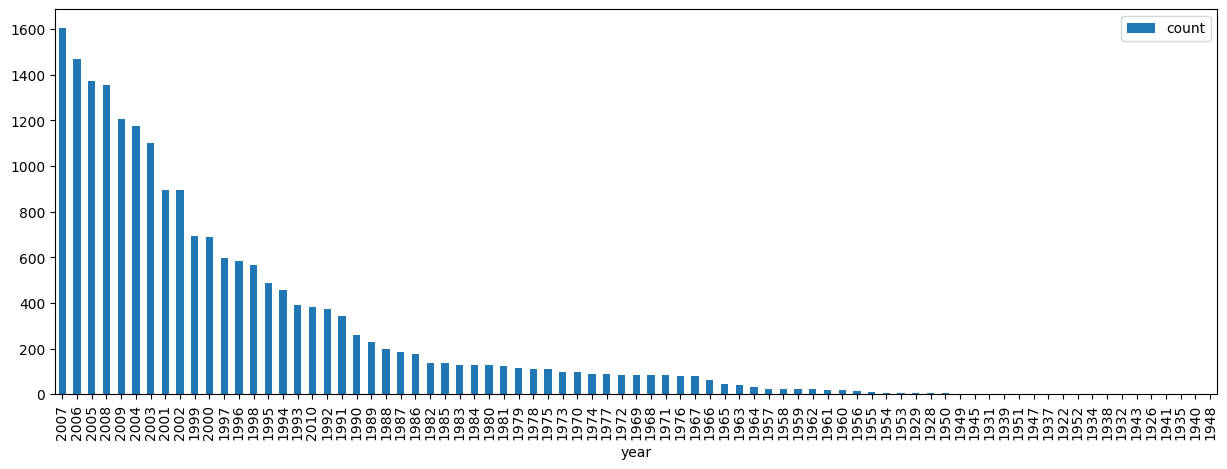

In [20]:
df3.toPandas().plot(x='year', y='count', kind='bar', figsize=(15,5))

Potremmo calcolare per ogni artista la durata media dei brani

In [21]:
df4 = df1.groupBy('artist_name').avg('duration')
df4.show()

+--------------------+------------------+
|         artist_name|     avg(duration)|
+--------------------+------------------+
|       Rhian Sheehan|230.94289199999997|
|        Boyd Tinsley|         172.40771|
|Dashboard Confess...|214.96988666666667|
|     Patrik Isaksson|        270.680365|
|        Yann Tiersen|         120.39791|
|        This Is Hell|         150.72608|
|       Black Debbath|        284.283625|
|    The Flower Kings|313.00526249999996|
|     Big John Patton|         404.50567|
|     Shannon McNally|        283.075465|
|        Elvis Crespo|         238.75873|
|          Leng Tch'e|         94.066485|
|     Robyn Hitchcock|223.43138249999998|
|          Eurythmics|        258.000528|
|          Sound Team|        224.926895|
|The Partridge Family|         172.56444|
|         Silverstein|         237.68771|
|              SINNER|245.52444666666665|
|         Brian Tyler|         148.63628|
|     Chalee Tennison|         241.47546|
+--------------------+------------

La durata è in secondi, se volessimo convertirla in minuti, potremmo applicare una UDF.

In [22]:
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import udf

toMin = udf(lambda sec: sec/60.0, DoubleType())
df5 = df1.select('id', 'title', 'year', 'artist_name', toMin('duration').alias('duration_min'))

In [23]:
df5.show()

+---+--------------------+----+-----------------+------------------+
| id|               title|year|      artist_name|      duration_min|
+---+--------------------+----+-----------------+------------------+
|  1|        Silent Night|2003| Faster Pussy cat| 4.200917666666666|
|  2|         Tanssi vaan|1995| Karkkiautomaatti|2.6091896666666665|
|  3|   No One Could Ever|2006|   Hudson Mohawke|          2.316183|
|  4|       Si Vos Querés|2003|      Yerba Brava| 2.417625166666667|
|  8|   2 Da Beat Ch'yall|1993|       Kris Kross|3.6867406666666667|
| 11|       L'antarctique|2007| 3 Gars Su'l Sofa|1.1493801666666668|
| 12|  El hijo del pueblo|1997|    Jorge Negrete|2.8038019999999997|
| 14|              Pilots|2005|        Tiger Lou| 5.307638666666667|
| 16|                 006|1998|  Lena Philipsson| 4.371148833333334|
| 17|(Looking For) The...|1994|     Shawn Colvin|          3.607938|
| 18|   Ethos of Coercion|2009|      Dying Fetus|           3.26704|
| 19|         Rock-N-Rule|2007|   

Possiamo eseguire anche il join tra più dataframe.
Dati i seguenti dataframe:<br />
<b>students</b>: elenco di studenti con formato (nome studente, matricola)<br />
<b>courses</b>: elenco di corsi con formato (nome corso, identificatore corso)<br />
  <b>exams</b>: elenco degli esami sostenuti da uno studente per un corso con formato (identificatore corso, matricola, data esame, voto esame)<br /><br />

Spark supporta i vari tipi di join (inner/outer)

In [24]:
studentsData = [('Alice', 1231), ('Bob', 4561), ('Sam', 7893), ('Alex', 1894)]
coursesData = [('Math', 'c1'), ('Info', 'c2')]
examsData = [('c1', 1231, '10/01/2018', 'A'), ('c1', 4561, '10/01/2018', 'C'), ('c1', 4561, '08/02/2018', 'B+'), ('c2', 7893, '18/02/2018', 'D')]

students = sqlContext.createDataFrame(studentsData, ['s_name', 's_id'])
courses = sqlContext.createDataFrame(coursesData, ['c_name', 'c_id'])
exams = sqlContext.createDataFrame(examsData, ['c_id', 's_id', 'date', 'grade'])

students.show()
courses.show()
exams.show()

+------+----+
|s_name|s_id|
+------+----+
| Alice|1231|
|   Bob|4561|
|   Sam|7893|
|  Alex|1894|
+------+----+

+------+----+
|c_name|c_id|
+------+----+
|  Math|  c1|
|  Info|  c2|
+------+----+

+----+----+----------+-----+
|c_id|s_id|      date|grade|
+----+----+----------+-----+
|  c1|1231|10/01/2018|    A|
|  c1|4561|10/01/2018|    C|
|  c1|4561|08/02/2018|   B+|
|  c2|7893|18/02/2018|    D|
+----+----+----------+-----+



In [25]:
#Con l'inner join vengono mantenuti solo i record che sono associati ad un altro record
#Nello specifico, Alex non ha sostenuto nessun esame e quindi non compare nel risultato
students.join(exams, students.s_id == exams.s_id, how="inner").join(courses, courses.c_id == exams.c_id, how="inner").show()

+------+----+----+----+----------+-----+------+----+
|s_name|s_id|c_id|s_id|      date|grade|c_name|c_id|
+------+----+----+----+----------+-----+------+----+
|   Bob|4561|  c1|4561|08/02/2018|   B+|  Math|  c1|
|   Bob|4561|  c1|4561|10/01/2018|    C|  Math|  c1|
| Alice|1231|  c1|1231|10/01/2018|    A|  Math|  c1|
|   Sam|7893|  c2|7893|18/02/2018|    D|  Info|  c2|
+------+----+----+----+----------+-----+------+----+



In [26]:
#Con l'outer join, invece, vengono mantenuti tutti i record
#Quindi compare anche Alex
students.join(exams, students.s_id == exams.s_id, how="outer").join(courses, courses.c_id == exams.c_id, how="outer").show()

+------+----+----+----+----------+-----+------+----+
|s_name|s_id|c_id|s_id|      date|grade|c_name|c_id|
+------+----+----+----+----------+-----+------+----+
|  Alex|1894|NULL|NULL|      NULL| NULL|  NULL|NULL|
| Alice|1231|  c1|1231|10/01/2018|    A|  Math|  c1|
|   Bob|4561|  c1|4561|10/01/2018|    C|  Math|  c1|
|   Bob|4561|  c1|4561|08/02/2018|   B+|  Math|  c1|
|   Sam|7893|  c2|7893|18/02/2018|    D|  Info|  c2|
+------+----+----+----+----------+-----+------+----+



# Spark SQL

Si possono registrare i dataframe come tabelle ed eseguire le operazioni direttamente in SQL.

Proviamo a rifare le operazioni sulle canzoni con SQL.

Registriamo il dataframe come tabella chiamata *songs*

In [27]:
df.createOrReplaceTempView("songs")

Ora possiamo interagire con la tabella usando direttamente l'SQL, quindi potremmo calcolare il numero di canzoni per anno

In [28]:
sqlContext.sql("SELECT year, COUNT(*) AS num_canzoni FROM songs WHERE year > 0 GROUP BY year ORDER BY num_canzoni DESC").show()

+----+-----------+
|year|num_canzoni|
+----+-----------+
|2007|       1607|
|2006|       1467|
|2005|       1371|
|2008|       1357|
|2009|       1206|
|2004|       1176|
|2003|       1102|
|2001|        896|
|2002|        896|
|1999|        695|
|2000|        691|
|1997|        599|
|1996|        582|
|1998|        566|
|1995|        489|
|1994|        458|
|1993|        393|
|2010|        382|
|1992|        372|
|1991|        342|
+----+-----------+
only showing top 20 rows



Oppure convertire direttamente la durata da secondi a minuti

In [29]:
sqlContext.sql("SELECT *, (duration/60) AS durata_min FROM songs").show()

+---+--------------------+--------------------+--------------------+---------+------------------+-----------------+----+------------------+
| id|               title|             release|         artist_name| duration|artist_familiarity|artist_hotttnesss|year|        durata_min|
+---+--------------------+--------------------+--------------------+---------+------------------+-----------------+----+------------------+
|  1|        Silent Night|Monster Ballads X...|    Faster Pussy cat|252.05506|    0.649822100201|   0.394031892714|2003| 4.200917666666666|
|  2|         Tanssi vaan|         Karkuteillä|    Karkkiautomaatti|156.55138|    0.439603966677|   0.356992107756|1995|2.6091896666666665|
|  3|   No One Could Ever|              Butter|      Hudson Mohawke|138.97098|    0.643680572058|   0.437503836595|2006|          2.316183|
|  4|       Si Vos Querés|             De Culo|         Yerba Brava|145.05751|    0.448501159656|   0.372349068517|2003| 2.417625166666667|
|  5|    Tangle Of A

Si possono eseguire sub queries.

Ad esempio, selezionare gli artisti che non hanno mai fatto una canzone più lunga di 500 secondi.

In [30]:
sqlContext.sql("SELECT DISTINCT artist_name FROM songs WHERE artist_name NOT IN (SELECT artist_name FROM songs WHERE duration > 500)").show()

+--------------------+
|         artist_name|
+--------------------+
|         Finis Tasby|
|       Rhian Sheehan|
|        Boyd Tinsley|
|Dashboard Confess...|
|     Patrik Isaksson|
|Natural Born Groo...|
|        Yann Tiersen|
|      ROBERT MIRABAL|
|             Delfins|
|          Jade Leary|
|      The Bumblebeez|
|        This Is Hell|
|       Black Debbath|
|    The Flower Kings|
|     Big John Patton|
|     Shannon McNally|
|        Elvis Crespo|
|          No Gravity|
|          Leng Tch'e|
|                  DZ|
+--------------------+
only showing top 20 rows



Si può anche registrare più tabelle ed eseguire il join tra di esse.

In [31]:
students.createOrReplaceTempView("students")
courses.createOrReplaceTempView("courses")
exams.createOrReplaceTempView("exams")

In [32]:
sqlContext.sql("SELECT * FROM students JOIN exams ON students.s_id = exams.s_id JOIN courses ON courses.c_id = exams.c_id").show()

+------+----+----+----+----------+-----+------+----+
|s_name|s_id|c_id|s_id|      date|grade|c_name|c_id|
+------+----+----+----+----------+-----+------+----+
|   Bob|4561|  c1|4561|08/02/2018|   B+|  Math|  c1|
|   Bob|4561|  c1|4561|10/01/2018|    C|  Math|  c1|
| Alice|1231|  c1|1231|10/01/2018|    A|  Math|  c1|
|   Sam|7893|  c2|7893|18/02/2018|    D|  Info|  c2|
+------+----+----+----+----------+-----+------+----+



# Pandas API on Spark
Spark ha anche un'estensione che consente di utilizzare la maggior parte delle API di Pandas sui propri dataframe.

Si può attivare importando *import pyspark.pandas as ps*

Nota: potrebbe dare un errore dicendo che non trova np.NaN, questo dipende dalle versioni dei pacchetti installati su colab. Si può risolvere eseguendo la seguente cella che cambia la versione di numpy

In [ ]:
!pip uninstall numpy --y
!pip install numpy==1.26.3

In [44]:
import pyspark.pandas as ps

Una volta fatto questo, possiamo utilizzare *ps* al posto di *pd* e usare la libreria esattamente come se fosse Pandas.

In [39]:
df = ps.read_csv('msd.csv', index_col='id')
df.head()

Selezionare i dati con l'anno maggiore di 0

In [52]:
df1 = df[df['year']>0]

Calcolare il numero di canzoni per anno esattamente come faremmo con Pandas

In [53]:
canzoni_anno = df1.groupby('year').agg({'title': 'count'}).sort_values(by='title', ascending=False)
canzoni_anno.head()

,title
year,
2007,1607
2006,1467
2005,1371
2008,1357
2009,1206


Creare una visualizzazione dei dati

In [55]:
canzoni_anno.plot(kind='bar')